# 02. Neural network classifcation with pytorch

Classification is a problem of predicting whether something is one thing or another



## 1. Data (let's make some)


In [ ]:
import sklearn
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
len(X) , len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [ ]:
# Make a dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


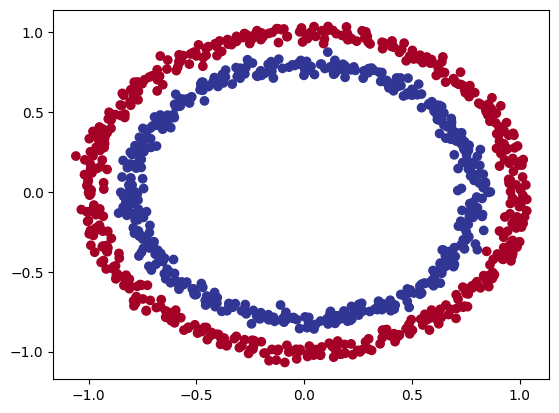

In [ ]:
# visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note: The data we're working with is often referred to as a toy dataset, a dataet that is small enough to experiment on, but still big enough to practice the fundamentals

### 1.1 check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and sample of y: {y_sample}")
print(f"Shapes for each: {X_sample.shape} and {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and sample of y: 1
Shapes for each: (2,) and ()


### 1.2 Turn data into tensors

In [ ]:
import torch

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% of data will be for testing
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. setup device agnostic code
2. Construct a model (by sublcassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop


In [ ]:
# import pytorch and nn
import torch
from torch import nn

# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

Now we've setup device agnostic code, let's create a model that:

1. Subclass `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines forward computation of model
4. Instantiate an instance of our model class and send it to the target device

In [ ]:
# 1. Construct a model sublcassing nn.Module
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. create nn.Linear() layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5)  # takes 2 features and upscales to 5
        self.layer_2 = nn.Linear(in_features=5, out_features=1)  # in_features of second layer must match out features of previous


        # alternatively, we can use nn.Sequential to construct a series of layers
        # self.two_linear_layers = nn.Sequential(
        #         nn.Linear(in_features=2, out_features=5),
        #         nn.Linear(in_features=5, out_features=1)
        # )

    def forward(self, x):
        return self.layer_2(self.layer_1(x))  # x -> layer_1 -> layer_2 -> output
        # return self.two_linear_layers(x)


# 4. instantiate an instance of our model class and send it to the target device
torch.manual_seed(42)
model_0 = CircleModelV1().to(device)
model_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Let's replicate the model above using nn.Sequential()
#   (we can insert this above into our model instead of explicitly listing our two layers)
model_B = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_B

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2060], device='cuda:0'))])

In [ ]:
# make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of preds: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of preds: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again, this is problem specific.

For example for regression, you may want MAE or MSE...
For classification, you may want binary cross entropy or categorical cross entropy.

https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a



In [ ]:
# setup the loss function
loss_fn = nn.BCEWithLogitsLoss()  # has sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## 3. Train model

### 3.1 Going from raw logits to prediction probabilities to prediction labels

Our model outputs are going to be raw **logits**.

We can convert these logits into prediction probabilities by passing them to some kind of actication function (sigmoid for binary problems, and softmax for multiclass problems)

Then we can convert out model's prediction probabilites to **prediction labels** by either rounding them or taking the argmax().

In [ ]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='cuda:0')

In [ ]:
# we're hoping to get these to look more like these
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# use the sigmoid activation function on our logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='cuda:0')

In [ ]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))  # squeeze isn't entirely necessary here, but it makes for lighter computation
# print(torch.eq(y_preds, y_pred_labels))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# put the data onto the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)



for epoch in range(epochs):
    model_0.train()

    # 1. forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # turn logits into pred probs into pred labels

    # 2. Calculate loss (and accuracy)
    # loss = loss_fn(torch.sigmoid(y_logits),  # nn.BCELoss() expects pred probs as input
    #                y_train)
    loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. zero grad
    optimizer.zero_grad()

    # 4. Backprop
    loss.backward()

    # 5. Optimizer step
    optimizer.step()


    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        # 2. test loss
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_preds)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0, | Loss: 0.69569, Acc: 50.00% | Test Loss: 0.69739, Test Acc: 50.00%
Epoch: 10, | Loss: 0.69544, Acc: 50.00% | Test Loss: 0.69720, Test Acc: 50.00%
Epoch: 20, | Loss: 0.69522, Acc: 50.00% | Test Loss: 0.69703, Test Acc: 50.00%
Epoch: 30, | Loss: 0.69501, Acc: 50.00% | Test Loss: 0.69688, Test Acc: 50.00%
Epoch: 40, | Loss: 0.69483, Acc: 50.00% | Test Loss: 0.69675, Test Acc: 50.00%
Epoch: 50, | Loss: 0.69467, Acc: 50.00% | Test Loss: 0.69663, Test Acc: 50.00%
Epoch: 60, | Loss: 0.69452, Acc: 50.00% | Test Loss: 0.69653, Test Acc: 50.00%
Epoch: 70, | Loss: 0.69438, Acc: 50.00% | Test Loss: 0.69644, Test Acc: 50.00%
Epoch: 80, | Loss: 0.69426, Acc: 50.00% | Test Loss: 0.69635, Test Acc: 50.00%
Epoch: 90, | Loss: 0.69415, Acc: 50.00% | Test Loss: 0.69628, Test Acc: 50.00%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything

To inspect it, let's make some preds and make them visual

In [ ]:
import requests
from pathlib import Path
import matplotlib.pyplot as plt

# Download helper functions from dbourke's repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download.")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download.


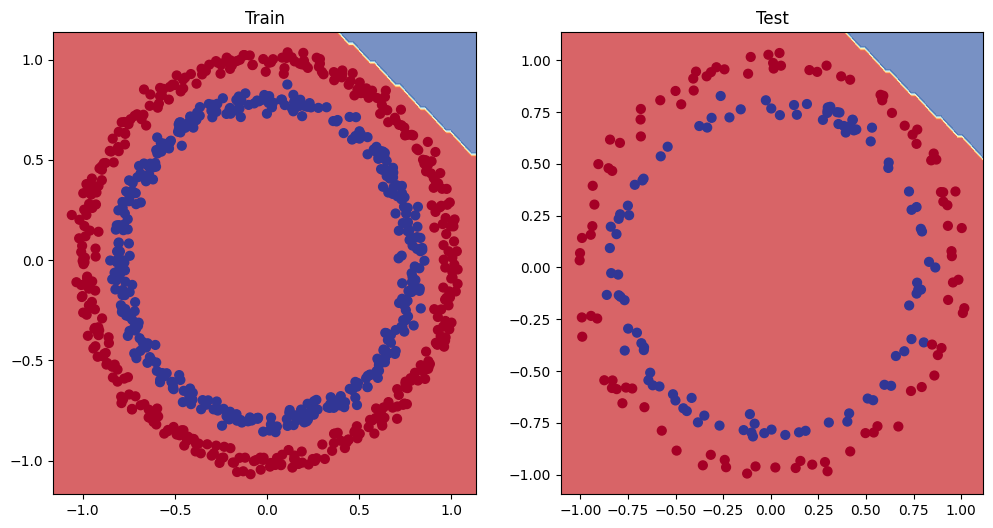

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improve a model (from a model perspective)
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - e.g. go from 5 hidden units to 10 units
* Fit for longer (more epochs)
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the *data*.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred to as **hyperparameters**.

In [ ]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # NOTE: z can often represent logits, which is what our forward output returns
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3( self.layer_2( self.layer_1(x) ) )  # this way speeds things up slightly

model_1 = CircleModelV2().to(device)
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

In [ ]:
# Create an optimizer
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1)

In [ ]:
# write a training and evaluation loop for model_1

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

model_1 = model_1.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. forward pass
    y_logits = model_1(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    # 2. loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_preds)

    # 3. optimizer zero_grad
    optimizer.zero_grad()

    # 4. back prop
    loss.backward()

    # 5. optimizer step
    optimizer.step()


    model_1.eval()
    with torch.inference_mode():
        y_test_logits = model_1(X_test).squeeze()
        y_test_preds = torch.round(torch.sigmoid(y_test_logits))

        test_loss = loss_fn(y_test_preds, y_test)
        test_acc = accuracy_fn(y_test,
                               y_test_preds)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0, | Loss: 0.69396, Acc: 50.88% | Test Loss: 0.75541, Test Acc: 51.00%
Epoch: 100, | Loss: 0.69305, Acc: 50.38% | Test Loss: 0.76681, Test Acc: 48.00%
Epoch: 200, | Loss: 0.69299, Acc: 51.12% | Test Loss: 0.77681, Test Acc: 46.00%
Epoch: 300, | Loss: 0.69298, Acc: 51.62% | Test Loss: 0.78301, Test Acc: 45.00%
Epoch: 400, | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.77801, Test Acc: 46.00%
Epoch: 500, | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.77801, Test Acc: 46.00%
Epoch: 600, | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.77801, Test Acc: 46.00%
Epoch: 700, | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.77801, Test Acc: 46.00%
Epoch: 800, | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.77801, Test Acc: 46.00%
Epoch: 900, | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.77801, Test Acc: 46.00%


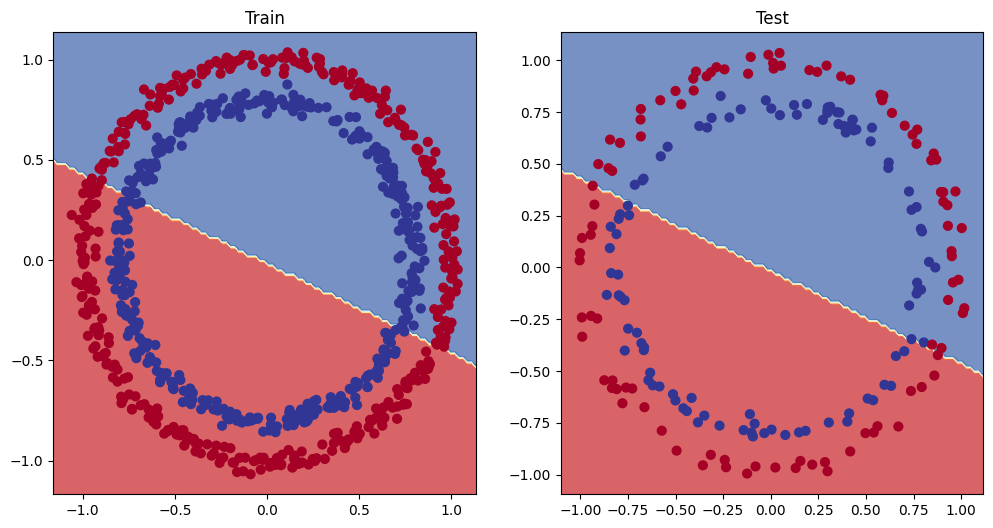

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 prep some data to see if model can fit a straight line instead

(let's see if our model can solve a smaller problem)

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

X_regression[:10] , y_regression[:10], len(X_regression), len(y_regression)

# Create a train/test split
train_split = int(0.8 * len(X_regression))

X_reg_train, y_reg_train = X_regression[:train_split], y_regression[:train_split]
X_reg_test, y_reg_test = X_regression[train_split:], y_regression[train_split:]

len(X_reg_train), len(y_reg_train), len(X_reg_test), len(y_reg_test)

(80, 80, 20, 20)

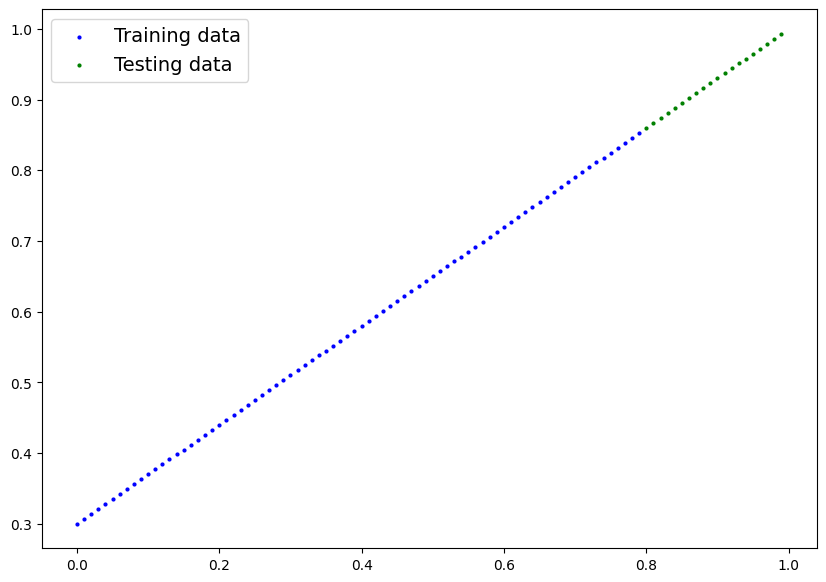

In [ ]:
plot_predictions(train_data=X_reg_train,
                 train_labels=y_reg_train,
                 test_data=X_reg_test,
                 test_labels=y_reg_test)


In [ ]:
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 Adjusting `model_1` to fit straight line data

In [ ]:
# same architecture as model_1 but using nn.sequential
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

model_2.to(device)
X_reg_train, y_reg_train = X_reg_train.to(device), y_reg_train.to(device)
X_reg_test, y_reg_test = X_reg_test.to(device), y_reg_test.to(device)

for epoch in range(epochs):
    model_2.train()

    y_pred = model_2(X_reg_train)
    loss = loss_fn(y_pred, y_reg_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_reg_test)
        test_loss = loss_fn(test_pred, y_reg_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.94965
Epoch: 100 | Loss: 0.40272 | Test loss: 0.54029
Epoch: 200 | Loss: 0.05876 | Test loss: 0.13480
Epoch: 300 | Loss: 0.01461 | Test loss: 0.03342
Epoch: 400 | Loss: 0.00308 | Test loss: 0.00008
Epoch: 500 | Loss: 0.00309 | Test loss: 0.00012
Epoch: 600 | Loss: 0.00309 | Test loss: 0.00018
Epoch: 700 | Loss: 0.00299 | Test loss: 0.00011
Epoch: 800 | Loss: 0.00299 | Test loss: 0.00016
Epoch: 900 | Loss: 0.00289 | Test loss: 0.00011


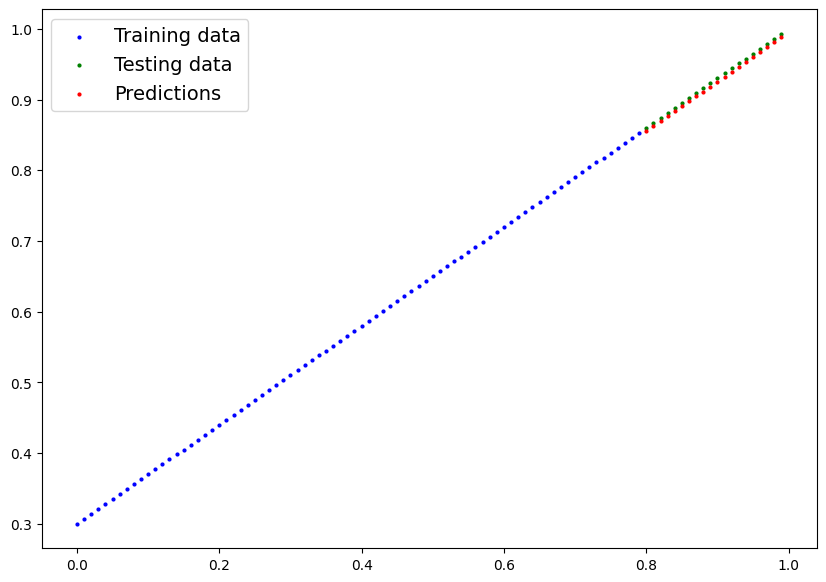

In [ ]:
model_2.eval()
with torch.inference_mode():
    y_reg_preds = model_2(X_reg_test)

plot_predictions(train_data=X_reg_train.cpu(),
                 train_labels=y_reg_train.cpu(),
                 test_data=X_reg_test.cpu(),
                 test_labels=y_reg_test.cpu(),
                 predictions=test_pred.cpu())

Looks like it's learning!!

## 6. The missing piece: non-linearity

what patterns could you draw if you were given an infinite amount of straight and non-straight lines?

in machine learning terms, an "infinite" amount of linear and non-linear functions.


### 6.1 Recreating non-linear data


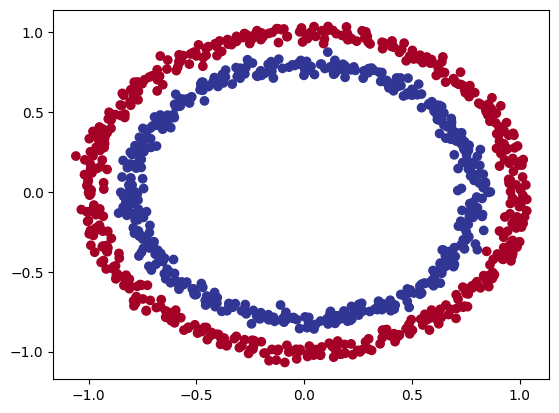

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# convert data to tensors andthen to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
### 6.2 building model with non-linear activation functions
from torch import nn

class CircleModelV3(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=1)

        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(
            self.relu( self.layer_2(
                self.relu( self.layer_1(x) )
                    )
                )
            )

model_3 = CircleModelV3().to(device)
model_3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

model_3 = model_3.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_3.train()

    # 1. forward pass
    y_logits = model_3(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    # 2. loss and acc
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_preds)

    # 3. zero grad
    optimizer.zero_grad()

    # 4. back prop
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_preds)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0, | Loss: 0.61250, Acc: 87.38% | Test Loss: 0.62885, Test Acc: 85.00%
Epoch: 100, | Loss: 0.60872, Acc: 89.00% | Test Loss: 0.62559, Test Acc: 86.00%
Epoch: 200, | Loss: 0.60473, Acc: 90.62% | Test Loss: 0.62221, Test Acc: 87.00%
Epoch: 300, | Loss: 0.60052, Acc: 92.38% | Test Loss: 0.61865, Test Acc: 87.00%
Epoch: 400, | Loss: 0.59605, Acc: 93.00% | Test Loss: 0.61487, Test Acc: 88.00%
Epoch: 500, | Loss: 0.59131, Acc: 94.38% | Test Loss: 0.61089, Test Acc: 90.00%
Epoch: 600, | Loss: 0.58630, Acc: 95.38% | Test Loss: 0.60669, Test Acc: 91.00%
Epoch: 700, | Loss: 0.58101, Acc: 96.25% | Test Loss: 0.60228, Test Acc: 91.50%
Epoch: 800, | Loss: 0.57541, Acc: 96.38% | Test Loss: 0.59754, Test Acc: 92.00%
Epoch: 900, | Loss: 0.56948, Acc: 96.88% | Test Loss: 0.59244, Test Acc: 92.00%


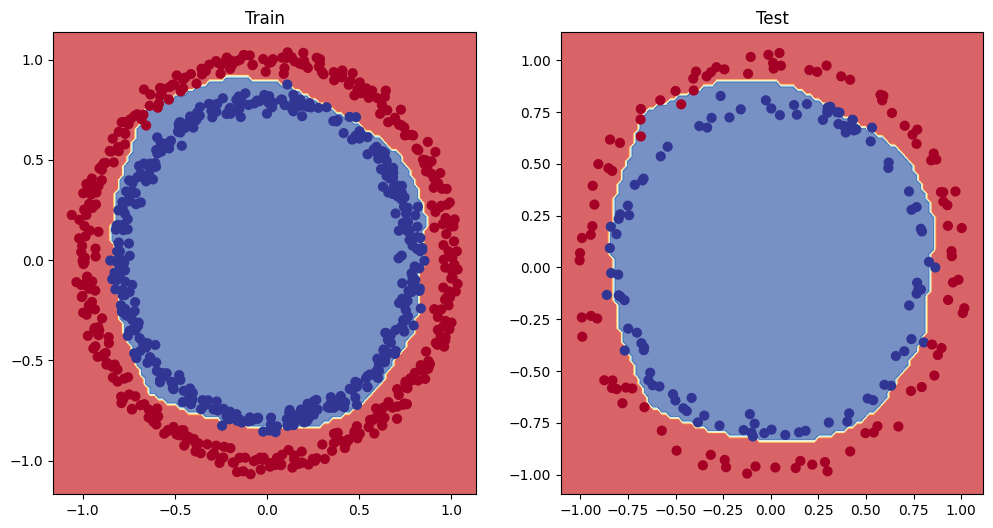

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it figures patterns out on its own.

These tools are combinations of linear and non-linear functions

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

without specificying the dtype, it would give us a int64 dtype here. This is because we asked for a range of integers. To ask for a range of floats, we could use `torch.arange(-10., 10., 1)`, or have the step be rational.

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

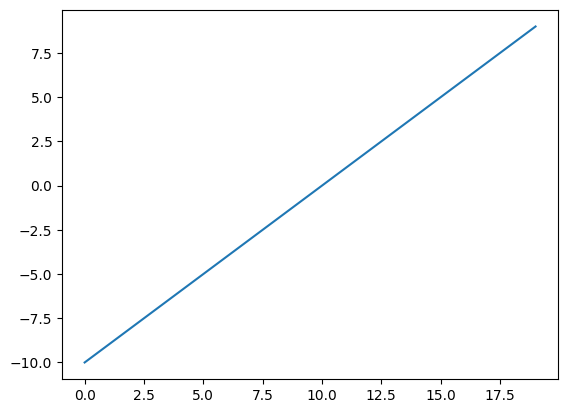

In [ ]:
# Visualize
plt.plot(A)

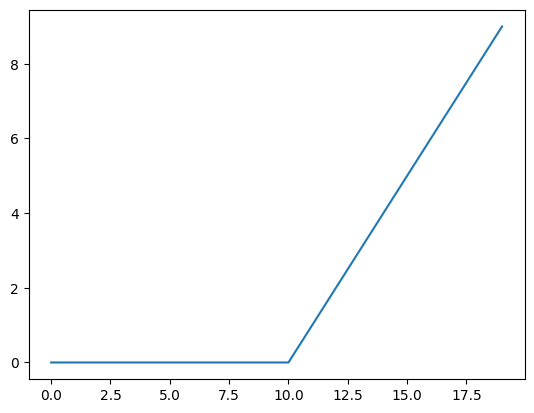

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x) -> torch.tensor:
    return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

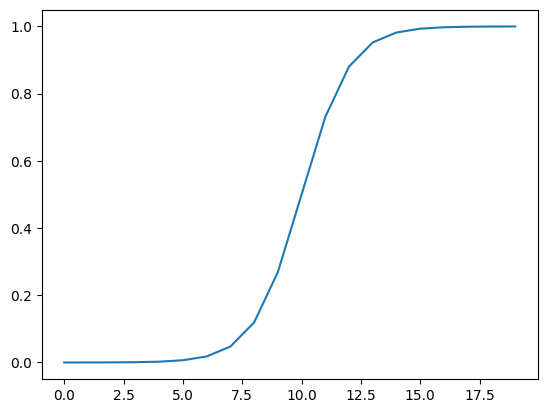

In [ ]:
def sigmoid(x) -> torch.tensor:
    return 1 / (1 + torch.exp(-x))

plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem.

* Binary Classification = one thing or another
* Multi-class classification = determining what something is out of more than two options.

### 8.1 creating a toy multi-class dataset

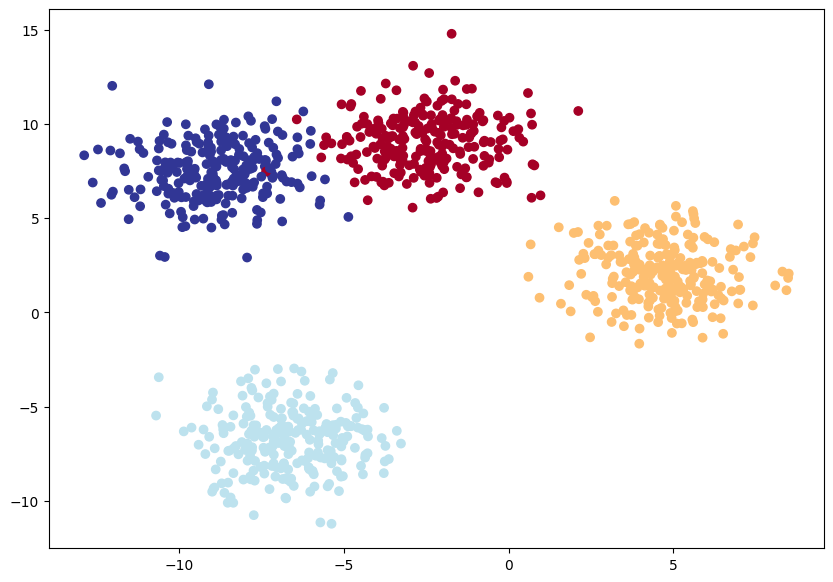

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)


### 8.2 Building a multi-class classification model

In [ ]:
# Create device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi-class classification model.
        Args:
            input_features (int): Number of input features of the model.
            output_features (int): Number of output features (output classes)
            hidden_units (int): Number of hidden units between layers, 8 by default

        Returns:

        """
        super().__init__()

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


# Create instance of BlobModel and send to target device

model_4 = BlobModel(input_features=len(X_blob_train.shape),
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create loss function and optimizer

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [ ]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))

In [ ]:
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [ ]:
# Convert model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [ ]:
# max gives the value, argmax gives the index of the max values
torch.max(y_pred_probs[0]), torch.argmax(y_pred_probs[0])

(tensor(0.3244, device='cuda:0'), tensor(1, device='cuda:0'))

In [ ]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training andtesting loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

model_4 = model_4.to(device)
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    model_4.eval()

    y_logits = model_4(X_blob_train)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
    # y_preds = torch.argmax(y_pred_probs, dim=1)

    loss = loss_fn(y_logits,
                   y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_preds)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    model_4.eval()
    with torch.inference_mode():
        y_test_logits = model_4(X_blob_test)
        y_test_preds = torch.softmax(y_test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(y_test_logits,
                            y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test,
                               y_pred=y_test_preds)

    if epoch % (epochs/10) == 0:
        print(f"Epoch: {epoch} | Loss: {loss}, Acc: {acc} | Test Loss: {test_loss}, test acc: {test_acc}")


Epoch: 0 | Loss: 1.1588265895843506, Acc: 40.375 | Test Loss: 1.0755419731140137, test acc: 48.0
Epoch: 10 | Loss: 0.6447554230690002, Acc: 96.75 | Test Loss: 0.6606872081756592, test acc: 97.5
Epoch: 20 | Loss: 0.42535150051116943, Acc: 98.5 | Test Loss: 0.43074119091033936, test acc: 100.0
Epoch: 30 | Loss: 0.2529423236846924, Acc: 99.125 | Test Loss: 0.24507619440555573, test acc: 99.5
Epoch: 40 | Loss: 0.11232151091098785, Acc: 99.25 | Test Loss: 0.10228516906499863, test acc: 99.5
Epoch: 50 | Loss: 0.06626511365175247, Acc: 99.25 | Test Loss: 0.058475375175476074, test acc: 99.5
Epoch: 60 | Loss: 0.05068015679717064, Acc: 99.25 | Test Loss: 0.042932283133268356, test acc: 99.5
Epoch: 70 | Loss: 0.042996764183044434, Acc: 99.25 | Test Loss: 0.03490966185927391, test acc: 99.5
Epoch: 80 | Loss: 0.038361385464668274, Acc: 99.25 | Test Loss: 0.029878225177526474, test acc: 99.5
Epoch: 90 | Loss: 0.03524843230843544, Acc: 99.25 | Test Loss: 0.026626527309417725, test acc: 99.5


### 8.6 Making and evaluating predictions with a pytorch multi-class model

In [ ]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_preds = torch.argmax(y_pred_probs, dim=1)

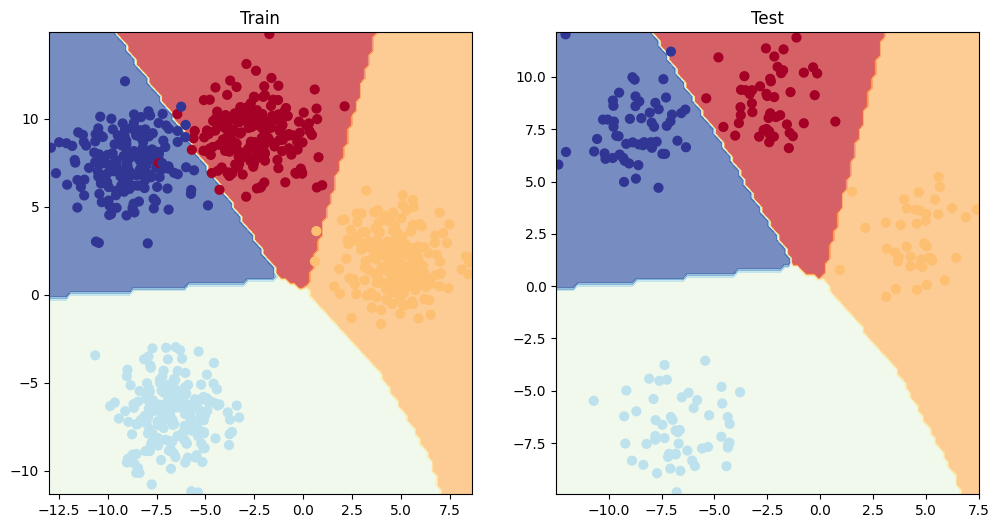

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics
* Accuracy
* precision
* recall
* F1-score (combines precision and recall)
* confusion matrix
* classification report

Check out TorchMetrics

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy()

torchmetric_accuracy(y_preds, y_blob_test)

TypeError: ignored